In [1]:
# Install Java, Spark, and Findspark
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (129 kB/s)
Reading package lists... Done


In [2]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from google.colab import files

In [3]:
df1 = pd.read_csv("Fake.csv")
df2 = pd.read_csv("True.csv")
df3 = pd.read_csv("train.csv")

In [4]:
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df1['label'] = "0"
df2['label'] = "1"

In [6]:
combine_df = pd.concat([df1,df2])
combine_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
combine_df = combine_df.drop(["subject","date"],axis=1)

In [8]:
df3.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df3 = df3.replace({'label': {0: "True", 1: "Fake"}})

In [10]:
df3.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,True
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake


In [11]:
df3 = df3.replace({'label': {"True": 1, "Fake":0 }})
df3.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,0


In [12]:
full_df = pd.concat([combine_df,df3])

In [13]:
full_df["full_text"] = full_df["title"].combine_first(full_df["text"])

In [14]:
full_df = full_df.drop(["id","author","text","title"],axis=1)

In [15]:
full_df

,label,full_text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
20795,1,Rapper T.I.: Trump a ’Poster Child For White S...
20796,1,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,1,Macy’s Is Said to Receive Takeover Approach by...
20798,0,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [16]:
full_df = full_df.reset_index()

In [17]:
full_df

,index,label,full_text
0,0,0,Donald Trump Sends Out Embarrassing New Year’...
1,1,0,Drunk Bragging Trump Staffer Started Russian ...
2,2,0,Sheriff David Clarke Becomes An Internet Joke...
3,3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...
65693,20795,1,Rapper T.I.: Trump a ’Poster Child For White S...
65694,20796,1,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
65695,20797,1,Macy’s Is Said to Receive Takeover Approach by...
65696,20798,0,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [18]:
full_df = full_df.drop(["index"],axis=1)
full_df

,label,full_text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
65693,1,Rapper T.I.: Trump a ’Poster Child For White S...
65694,1,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
65695,1,Macy’s Is Said to Receive Takeover Approach by...
65696,0,"NATO, Russia To Hold Parallel Exercises In Bal..."


# Tokenization

In [19]:
def tokeniz(text):
    token = re.split('\W+', text)
    return token

full_df["token_text"] = full_df["full_text"].apply(lambda x:tokeniz(x.lower()))
full_df.head()

,label,full_text,token_text
0,0,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne..."
1,0,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r..."
2,0,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern..."
3,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba..."
4,0,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t..."


# Remove stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stopword = nltk.corpus.stopwords.words('english')

In [22]:
def remove_stopword(token):
    text = [word for word in token if word not in stopword]
    return text

full_df["nostopword_text"] = full_df["token_text"].apply(lambda x:remove_stopword(x))

full_df.head()

,label,full_text,token_text,nostopword_text
0,0,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne...","[, donald, trump, sends, embarrassing, new, ye..."
1,0,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r..."
2,0,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern...","[, sheriff, david, clarke, becomes, internet, ..."
3,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba...","[, trump, obsessed, even, obama, name, coded, ..."
4,0,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t...","[, pope, francis, called, donald, trump, chris..."


# Lemmatizing

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
wl = WordNetLemmatizer()

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
def lemmatizing(stopword):
    text = [wl.lemmatize(word) for word in stopword]
    return text

full_df["lemmatizing_text"] = full_df["nostopword_text"].apply(lambda x:lemmatizing(x))

full_df.head()

,label,full_text,token_text,nostopword_text,lemmatizing_text
0,0,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne...","[, donald, trump, sends, embarrassing, new, ye...","[, donald, trump, sends, embarrassing, new, ye..."
1,0,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r..."
2,0,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern...","[, sheriff, david, clarke, becomes, internet, ...","[, sheriff, david, clarke, becomes, internet, ..."
3,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba...","[, trump, obsessed, even, obama, name, coded, ...","[, trump, obsessed, even, obama, name, coded, ..."
4,0,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t...","[, pope, francis, called, donald, trump, chris...","[, pope, francis, called, donald, trump, chris..."


In [29]:
full_df["lemmatizing_text2"] = [" ".join(x) for x in list(full_df["lemmatizing_text"])]

In [88]:
# clean_df.to_csv("clean_data.csv")
full_df["lemmatizing_text2"]

0         donald trump sends embarrassing new year eve ...
1         drunk bragging trump staffer started russian ...
2         sheriff david clarke becomes internet joke th...
3         trump obsessed even obama name coded website ...
4         pope francis called donald trump christmas sp...
                               ...                        
65693           rapper trump poster child white supremacy 
65694    n f l playoff schedule matchup odds new york time
65695    macy said receive takeover approach hudson bay...
65696            nato russia hold parallel exercise balkan
65697                                      keep f 35 alive
Name: lemmatizing_text2, Length: 65698, dtype: object

# N-Grams

In [30]:
fake_df = full_df[(full_df["label"] == "0")]
true_df = full_df[(full_df["label"] == "1")]

In [31]:
# from sklearn.feature_extraction.text import CountVectorizer
# def get_top_text_ngrams(corpus, n, g):
#     vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

In [32]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [33]:
true_word = basic_clean(''.join(str(true_df['full_text'].tolist())))

In [34]:
true_bigrams = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

In [35]:
true_bigrams

(White, House)             784
(North, Korea)             668
(Trump, say)               365
(Islamic, State)           229
(Supreme, Court)           227
(say, US)                  172
(Puerto, Rico)             170
(US, House)                160
(travel, ban)              155
(US, Senate)               151
(say, Trump)               138
(Trump, administration)    127
(South, Korea)             126
(Factbox, Trump)           121
(Russia, probe)            120
(US, lawmaker)             119
(nuclear, deal)            115
(tax, bill)                112
(New, York)                109
(foreign, minister)        102
dtype: int64

In [36]:
true_trigrams = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]

In [37]:
true_trigrams

(White, House, say)          87
(Factbox, Trump, Twitter)    72
(House, Speaker, Ryan)       71
(Iran, nuclear, deal)        70
(The, Trump, presidency)     62
(Trump, travel, ban)         56
(Highlights, The, Trump)     46
(White, House, Trump)        45
(South, China, Sea)          44
(UK, PM, May)                38
(North, Korea, sanction)     35
(Supreme, Court, nominee)    32
(US, appeal, court)          31
(Puerto, Rico, debt)         31
(US, top, court)             30
(US, Supreme, Court)         30
(North, Korea, nuclear)      29
(say, North, Korea)          27
(South, Koreas, Moon)        25
(US, attorney, general)      25
dtype: int64

In [38]:
fake_word = basic_clean(''.join(str(fake_df['full_text'].tolist())))

In [39]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_word, 2)).value_counts())[:20]

In [40]:
fake_trigrams = (pd.Series(nltk.ngrams(fake_word, 3)).value_counts())[:20]

In [41]:
fake_bigrams

(Donald, Trump)       610
(VIDEO, WATCH)        302
(President, Trump)    288
(White, House)        288
(Trump, Is)           256
(In, The)             249
(Hillary, Clinton)    249
(VIDEO, Trump)        231
(Of, The)             230
(To, Be)              217
(Fox, News)           214
(On, The)             209
(Trump, For)          198
(Bernie, Sanders)     195
(Out, Of)             189
(Trump, Just)         187
(Trump, VIDEO)        178
(Ted, Cruz)           171
(To, The)             162
(Boiler, Room)        162
dtype: int64

In [42]:
fake_trigrams

(Boiler, Room, EP)             104
(Black, Lives, Matter)          95
(The, White, House)             70
(To, Vote, For)                 42
(BLACK, LIVES, MATTER)          42
(In, Front, Of)                 41
(On, Social, Media)             41
(Supreme, Court, Justice)       39
(VIDEO, Donald, Trump)          37
(New, York, Times)              37
(Fox, News, Host)               36
(BOILER, ROOM, EP)              34
(A, Handed, To)                 33
(Donald, Trump, Is)             33
(Is, About, To)                 32
(Handed, To, Him)               32
(Donald, Trump, VIDEO)          31
(Is, Going, To)                 29
(Patrick, Henningsen, LIVE)     28
(Want, You, To)                 28
dtype: int64

# WordCloud

In [101]:
from wordcloud import WordCloud,STOPWORDS

In [102]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color = 'black',
                         max_words = 2000,
                         width=1600,
                         height=800).generate("".join(text))
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

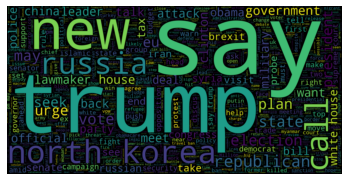

In [103]:
plot_wordcloud(true_df.lemmatizing_text2)

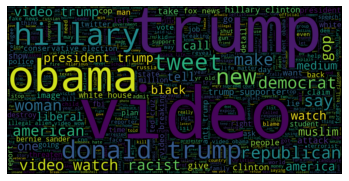

In [104]:
plot_wordcloud(fake_df.lemmatizing_text2)

# One Hot Encoding and Neural Networks with Keras

In [43]:
full_df.head()

,label,full_text,token_text,nostopword_text,lemmatizing_text,lemmatizing_text2
0,0,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne...","[, donald, trump, sends, embarrassing, new, ye...","[, donald, trump, sends, embarrassing, new, ye...",donald trump sends embarrassing new year eve ...
1,0,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r...",drunk bragging trump staffer started russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern...","[, sheriff, david, clarke, becomes, internet, ...","[, sheriff, david, clarke, becomes, internet, ...",sheriff david clarke becomes internet joke th...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba...","[, trump, obsessed, even, obama, name, coded, ...","[, trump, obsessed, even, obama, name, coded, ...",trump obsessed even obama name coded website ...
4,0,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t...","[, pope, francis, called, donald, trump, chris...","[, pope, francis, called, donald, trump, chris...",pope francis called donald trump christmas sp...


In [44]:
data = full_df.values

In [45]:
data[:,0]

array(['0', '0', '0', ..., 1, 0, 0], dtype=object)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(full_df ["lemmatizing_text2"])
tfIdf

<65698x27892 sparse matrix of type '<class 'numpy.float64'>'
	with 605842 stored elements in Compressed Sparse Row format>

In [48]:
X = tfIdf
y = data[:, 0]

In [49]:
y = y.astype("int")

In [50]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
X

<65698x27892 sparse matrix of type '<class 'numpy.float64'>'
	with 605842 stored elements in Compressed Sparse Row format>

In [55]:
# clean_df["text"].describe()

In [56]:
# from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [57]:
# encoded_y, y

In [58]:
# from keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
X

<65698x27892 sparse matrix of type '<class 'numpy.float64'>'
	with 605842 stored elements in Compressed Sparse Row format>

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
X_train.shape

(49273, 27892)

In [56]:
X_test.shape

(16425, 27892)

In [57]:
y_train

array([1, 0, 1, ..., 1, 1, 1])

In [58]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [59]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [60]:
from tensorflow.keras.models import Sequential

model = Sequential()
from tensorflow.keras.layers import Dense
number_inputs = 27892
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [61]:
X_train.sort_indices()

In [62]:
X_test.sort_indices()

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 111572    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 111,582
Trainable params: 111,582
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
1540/1540 - 2s - loss: 0.3820 - accuracy: 0.8847
Epoch 2/10
1540/1540 - 2s - loss: 0.1774 - accuracy: 0.9368
Epoch 3/10
1540/1540 - 2s - loss: 0.1345 - accuracy: 0.9516
Epoch 4/10
1540/1540 - 2s - loss: 0.1112 - accuracy: 0.9602
Epoch 5/10
1540/1540 - 2s - loss: 0.0952 - accuracy: 0.9671
Epoch 6/10
1540/1540 - 2s - loss: 0.0836 - accuracy: 0.9721
Epoch 7/10
1540/1540 - 2s - loss: 0.0744 - accuracy: 0.9749
Epoch 8/10
1540/1540 - 2s - loss: 0.0671 - accuracy: 0.9779
Epoch 9/10
1540/1540 - 2s - loss: 0.0613 - accuracy: 0.9799
Epoch 10/10
1540/1540 - 2s - loss: 0.0566 - accuracy: 0.9822


In [66]:
X_train[0]

<1x27892 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [67]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"One Hot Encoding - Loss: {model_loss}, Accuracy: {model_accuracy}")

514/514 - 0s - loss: 0.2891 - accuracy: 0.9103
One Hot Encoding - Loss: 0.2890552878379822, Accuracy: 0.9102587699890137


In [68]:
y_test[3]

1

In [69]:
model.predict_classes(X_test[5])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0])

In [70]:
model.predict_classes(X_test[10])

array([0])

In [ ]:
# def findClass(new_data):
#   #tfIdfVectorizer=TfidfVectorizer(use_idf=True)
#   new_tfidf = tfIdfVectorizer.transform([new_data])
#   new_tfidf.sort_indices()
#   new_pred = model.predict_classes(new_tfidf)
#   return new_pred[0]

# Deep Learning

In [ ]:
deep_model = Sequential()
deep_model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
deep_model.add(Dense(units=number_hidden_nodes, activation='relu'))
number_classes = 2
deep_model.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
deep_model.summary()

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

# Naive Bayes

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, np.ravel(y_train))

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
y_pred_nb = nb.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_nb))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_nb)))

In [ ]:
def findClass_nb(new_data):
  new_nb = tfIdfVectorizer.transform([new_data])
  new_nb.sort_indices()
  new_pred = nb.predict(new_nb)
  return new_pred[0]

In [ ]:
findClass_nb(full_df['full_text'][6])

### Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_nb)
print(cm)


In [ ]:

import seaborn as sns
labels =  np.array([cm[0],cm[1]])
sns.heatmap(cm, annot=labels, fmt = '',cmap="YlGn_r")
plt.show()

In [ ]:

print(metrics.classification_report(y_test, y_pred_nb))

In [ ]:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
y_pred_lr = classifier.predict(X_test)
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


In [ ]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
print (lr_cm)

In [ ]:
labels = np.array([lr_cm[0],lr_cm[1]])
sns.heatmap(lr_cm, annot=labels, fmt = '',cmap="Blues_r")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_lr))

In [ ]:
y_pred_prob_lr = classifier.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_lr)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
y_pred_rf = rf.predict(X_test)
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_rf))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

In [ ]:
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print (rf_cm)

In [ ]:
labels = np.array([rf_cm[0],rf_cm[1]])
sns.heatmap(rf_cm, annot=labels, fmt = '',cmap="Reds")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))

In [ ]:
y_pred_prob_rf = classifier.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_rf)

# testing

In [121]:
def findClass(new_data):
  wl = WordNetLemmatizer()
  stopword= nltk.corpus.stopwords.words('english')
  words = re.split('\W+', new_data)
  print(f"Tokenization:{words}")
  text = []
  for word in words:
    if word not in stopword:
      text.append(wl.lemmatize(word))
      new_text = [" ".join(text)]
  new_tfidf = tfIdfVectorizer.transform(new_text)
  new_tfidf.sort_indices()
  print(f"StopWords:{words}")
  print(f"Lemmatize :{text}")
  print(f"Appened Text:{new_text}")
  print(f"TFIDF:{new_tfidf}")
  new_pred = model.predict_classes(new_tfidf)
  print(f"Prediction:{new_pred}")
  if new_pred == 0:
    print("This is Fake!")
  else:
    print("This is True!")

  return new_pred

In [118]:
new_val5 ="As the pandemic continues to sweep the US, Canadians are getting more and more concerned about what American visitors could be bringing with them over the border."
findClass(new_val5)

Tokenization:['As', 'the', 'pandemic', 'continues', 'to', 'sweep', 'the', 'US', 'Canadians', 'are', 'getting', 'more', 'and', 'more', 'concerned', 'about', 'what', 'American', 'visitors', 'could', 'be', 'bringing', 'with', 'them', 'over', 'the', 'border', '']
StopWords:['As', 'the', 'pandemic', 'continues', 'to', 'sweep', 'the', 'US', 'Canadians', 'are', 'getting', 'more', 'and', 'more', 'concerned', 'about', 'what', 'American', 'visitors', 'could', 'be', 'bringing', 'with', 'them', 'over', 'the', 'border', '']
Lemmatize :['As', 'pandemic', 'continues', 'sweep', 'US', 'Canadians', 'getting', 'concerned', 'American', 'visitor', 'could', 'bringing', 'border', '']
Appened Text:['As pandemic continues sweep US Canadians getting concerned American visitor could bringing border ']
TFIDF:  (0, 1466)	0.18221239039651216
  (0, 1964)	0.3061433942413267
  (0, 3388)	0.20812565573234706
  (0, 3636)	0.32538041874204
  (0, 5279)	0.2777313873022
  (0, 5526)	0.2732344084374311
  (0, 5732)	0.20493630768

array([0])

In [116]:
new_val4 = "U.S. lawmakers question businessman at 2016 Trump Tower meeting"
findClass(new_val4)

Tokenization:['U', 'S', 'lawmakers', 'question', 'businessman', 'at', '2016', 'Trump', 'Tower', 'meeting']
StopWords:['U', 'S', 'lawmakers', 'question', 'businessman', 'at', '2016', 'Trump', 'Tower', 'meeting']
Lemmatize :['U', 'S', 'lawmaker', 'question', 'businessman', '2016', 'Trump', 'Tower', 'meeting']
Appened Text:['U S lawmaker question businessman 2016 Trump Tower meeting']
TFIDF:  (0, 273)	0.34909661546226983
  (0, 3888)	0.5235567541036659
  (0, 13897)	0.3443835955990755
  (0, 15167)	0.3552991746614797
  (0, 19149)	0.36027196512881915
  (0, 24319)	0.4595314521329872
  (0, 24592)	0.13497136553770317
Prediction:[1]
This is True!


array([1])

In [112]:
new_val1 = "Drunk Bragging Trump Staffer Started Russian Collusion Investigation"
findClass(new_val1)

Tokenization:['Drunk', 'Bragging', 'Trump', 'Staffer', 'Started', 'Russian', 'Collusion', 'Investigation']
StopWords:['Drunk', 'Bragging', 'Trump', 'Staffer', 'Started', 'Russian', 'Collusion', 'Investigation']
Lemmatize :['Drunk', 'Bragging', 'Trump', 'Staffer', 'Started', 'Russian', 'Collusion', 'Investigation']
Appened Text:['Drunk Bragging Trump Staffer Started Russian Collusion Investigation']
TFIDF:  (0, 3497)	0.4411048769484875
  (0, 5064)	0.3879099601555091
  (0, 7721)	0.41661758176347563
  (0, 12749)	0.3034925313171012
  (0, 20768)	0.2600439336605619
  (0, 22705)	0.37963242628713895
  (0, 22778)	0.4054285758466998
  (0, 24592)	0.11471036443713818
Prediction:[0]
This is Fake!


array([0])

In [113]:
new_val2= " Donald Trump Sends Out Embarrassing New Year’s Eve Message"
findClass(new_val2)

Tokenization:['', 'Donald', 'Trump', 'Sends', 'Out', 'Embarrassing', 'New', 'Year', 's', 'Eve', 'Message']
StopWords:['', 'Donald', 'Trump', 'Sends', 'Out', 'Embarrassing', 'New', 'Year', 's', 'Eve', 'Message']
Lemmatize :['', 'Donald', 'Trump', 'Sends', 'Out', 'Embarrassing', 'New', 'Year', 'Eve', 'Message']
Appened Text:[' Donald Trump Sends Out Embarrassing New Year Eve Message']
TFIDF:  (0, 7503)	0.23699501834340966
  (0, 8172)	0.39527723981562896
  (0, 8678)	0.43170290752592433
  (0, 15294)	0.3346116892978488
  (0, 16336)	0.15719932934286782
  (0, 17125)	0.48846706137148077
  (0, 21423)	0.37832809701220815
  (0, 24592)	0.11820210546531815
  (0, 26656)	0.2623762490527631
Prediction:[0]
This is Fake!


array([0])

In [114]:
new_val3= "Trump says Russia probe will be fair"
findClass(new_val3)

Tokenization:['Trump', 'says', 'Russia', 'probe', 'will', 'be', 'fair']
StopWords:['Trump', 'says', 'Russia', 'probe', 'will', 'be', 'fair']
Lemmatize :['Trump', 'say', 'Russia', 'probe', 'fair']
Appened Text:['Trump say Russia probe fair']
TFIDF:  (0, 9026)	0.670685600420959
  (0, 18707)	0.5040736110047627
  (0, 20765)	0.3948860606202642
  (0, 21043)	0.31752230451991853
  (0, 24592)	0.19833104985545294
Prediction:[1]
This is True!


array([1])

In [ ]:
full_df.head()

In [86]:
full_df["full_text"][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [117]:
findClass(full_df["full_text"][0])

Tokenization:['', 'Donald', 'Trump', 'Sends', 'Out', 'Embarrassing', 'New', 'Year', 's', 'Eve', 'Message', 'This', 'is', 'Disturbing']
StopWords:['', 'Donald', 'Trump', 'Sends', 'Out', 'Embarrassing', 'New', 'Year', 's', 'Eve', 'Message', 'This', 'is', 'Disturbing']
Lemmatize :['', 'Donald', 'Trump', 'Sends', 'Out', 'Embarrassing', 'New', 'Year', 'Eve', 'Message', 'This', 'Disturbing']
Appened Text:[' Donald Trump Sends Out Embarrassing New Year Eve Message This Disturbing']
TFIDF:  (0, 7370)	0.37621999805244905
  (0, 7503)	0.21958308031154006
  (0, 8172)	0.3662363643863181
  (0, 8678)	0.3999858515027155
  (0, 15294)	0.31002788985970603
  (0, 16336)	0.14564995163736977
  (0, 17125)	0.45257956355544837
  (0, 21423)	0.35053246895665796
  (0, 24592)	0.10951783965253903
  (0, 26656)	0.24309956120727727
Prediction:[0]
This is Fake!


array([0])

In [120]:
new_val10= "Rock is solid"
findClass(new_val10)

Tokenization:['Rock', 'is', 'solid']
StopWords:['Rock', 'is', 'solid']
Lemmatize :['Rock', 'solid']
Appened Text:['Rock solid']
TFIDF:  (0, 20526)	0.5874667976442814
  (0, 22319)	0.8092482694856832
Prediction:[1]
This is True!


array([1])

In [123]:
new_val11 = "Macy’s Is Said to Receive Takeover Approach by"
findClass(new_val11)

Tokenization:['Macy', 's', 'Is', 'Said', 'to', 'Receive', 'Takeover', 'Approach', 'by']
StopWords:['Macy', 's', 'Is', 'Said', 'to', 'Receive', 'Takeover', 'Approach', 'by']
Lemmatize :['Macy', 'Is', 'Said', 'Receive', 'Takeover', 'Approach']
Appened Text:['Macy Is Said Receive Takeover Approach']
TFIDF:  (0, 1796)	0.4521343358351762
  (0, 14575)	0.5266666185292732
  (0, 19521)	0.44611678653398396
  (0, 20866)	0.33431545102223403
  (0, 23606)	0.45542266881021304
Prediction:[1]
This is True!


array([1])